In [65]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix,
                             precision_score, recall_score, f1_score,
                             precision_recall_curve, average_precision_score)

In [66]:
# Input Dataset

In [67]:
with h5py.File("ecg_tracings.hdf5", "r") as f:
    x = np.array(f['tracings'])
print("Test dataset dimension:", x.shape)

Test dataset dimension: (827, 4096, 12)


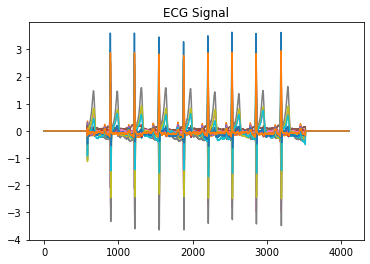

In [68]:
plt.title('ECG Signal')
plt.plot(x[12])
plt.show()

In [69]:
# Output Generated

In [70]:
y = np.load('dnn_output.npy')
print("Output dataset dimension for test data:", y.shape)

Output dataset dimension for test data: (827, 6)


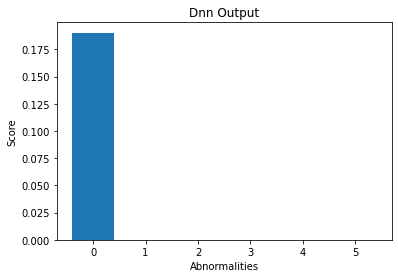

In [71]:
plt.title('Dnn Output')
plt.xlabel('Abnormalities')
plt.ylabel('Score')
plt.bar(np.arange(len(y[12])), y[12])
plt.show()

In [72]:
# Calculate Threshold

In [73]:
y_std = pd.read_csv('./data/annotations/gold_standard.csv').values
y_std.shape

(827, 6)

In [74]:
def get_optimal_precision_recall(y_true, y_score):
    """Find precision and recall values that maximize f1 score."""
    n = np.shape(y_true)[1]
    opt_precision = []
    opt_recall = []
    opt_threshold = []
    for k in range(n):
        # Get precision-recall curve
        precision, recall, threshold = precision_recall_curve(y_true[:, k], y_score[:, k])
        # Compute f1 score for each point (use nan_to_num to avoid nans messing up the results)
        f1_score = np.nan_to_num(2 * precision * recall / (precision + recall))
        # Select threshold that maximize f1 score
        index = np.argmax(f1_score)
        opt_precision.append(precision[index])
        opt_recall.append(recall[index])
        t = threshold[index - 1] if index != 0 else threshold[0] - 1e-10
        opt_threshold.append(t)
    return np.array(opt_precision), np.array(opt_recall), np.array(opt_threshold)

In [75]:
_, _, threshold = get_optimal_precision_recall(y_std, y)
threshold

array([0.17320162, 0.09543785, 0.06270668, 0.29563749, 0.2259171 ,
       0.10176626])

In [76]:
# Final Output

In [77]:
mask = y > threshold
mask.shape

(827, 6)

In [78]:
y_neuralnet = np.zeros_like(y)
y_neuralnet[mask] = 1
y.shape

(827, 6)

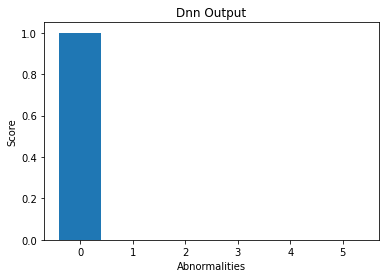

In [79]:
plt.title('Dnn Output')
plt.xlabel('Abnormalities')
plt.ylabel('Score')
plt.bar(np.arange(len(y_neuralnet[12])), y_neuralnet[12])
plt.show()